<a href="https://colab.research.google.com/github/faheemsecure/faheemanalytics/blob/master/Predicting_survival_on_titanic_using_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [3]:
#It will prompt you to select a file. Click on “Choose Files” then select and upload the file.
#Wait for the file to be 100% uploaded. 
#You should see the name of the file once Colab has uploaded it

from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [0]:
#make sure the filename matches the name of the uploaded file

import io
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
#check column wise null and missing values
df.apply(lambda x: sum(x.isnull()))

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
#display information of train dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [9]:
print("Percent of missing Age records is {}%".format((177/891)*100))

Percent of missing Age records is 19.865319865319865%


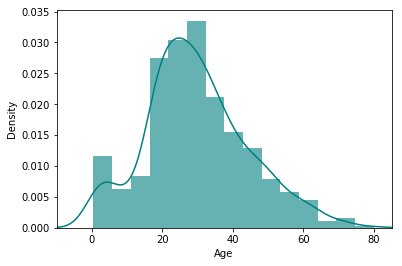

In [10]:
#display distribution of age column
ax = df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [11]:
print("Percent of missing Cabin records is {}%".format((687/891)*100))

Percent of missing Cabin records is 77.10437710437711%


In [12]:
print("Percent of missing Embarked records is {}%".format((2/891)*100))

Percent of missing Embarked records is 0.22446689113355783%


In [13]:
#from data set we know C==Cherbourg,Q=Queens,S=Southampton
print("Boarded passengers are grouped by port of Embark(C==Cherbourg,Q=Queens,S=Southampton)")
print(df['Embarked'].value_counts())

Boarded passengers are grouped by port of Embark(C==Cherbourg,Q=Queens,S=Southampton)
S    644
C    168
Q     77
Name: Embarked, dtype: int64


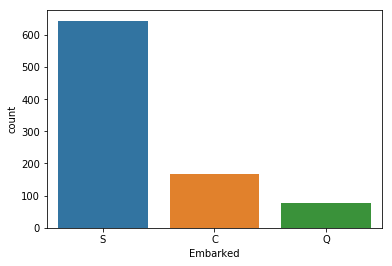

In [14]:
import seaborn as sns
sns.countplot(df['Embarked'])

In [0]:
/*Based on my assessment of the missing values in the dataset, I'll make the following changes to the data:
If "Age" is missing for a given row, I'll impute with 28 (median age). 
If "Embarked" is missing for a riven row, I'll impute with "S" (the most common boarding port).
I'll ignore "Cabin" as a variable. There are too many missing values for imputation. Based on the information available,
it appears that this value is associated with the passenger's class and fare paid*/

In [15]:
data = df.copy()
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
data['Age'].fillna(df['Age'].median(),inplace=True)
data['Embarked'].fillna(df['Embarked'].value_counts().idxmax(),inplace=True)
data.drop('Cabin',axis=1,inplace=True)

In [17]:
#check now null values are there in new dataframe
data.apply(lambda x: sum(x.isnull()))

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

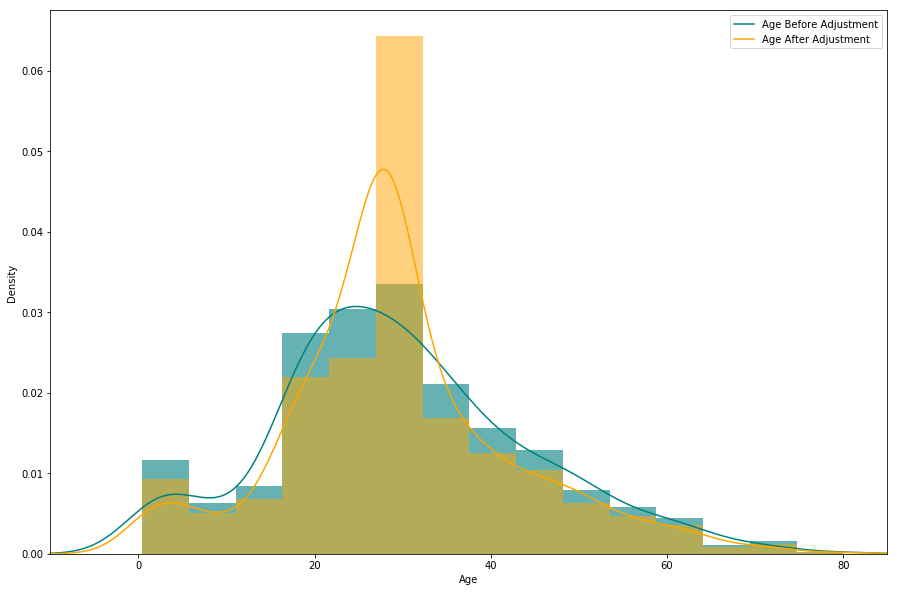

In [18]:
#comaprison of Age distibution before and after adjustment
plt.figure(figsize=(15,10))
ax = df['Age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df['Age'].plot(kind='density', color='teal')
ax = data['Age'].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
data['Age'].plot(kind='density', color='orange')
ax.legend(['Age Before Adjustment','Age After Adjustment'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [0]:
data['TravelAlone'] = np.where((data['SibSp']+data['Parch'])>0, 0, 1)
data.drop('SibSp',axis=1,inplace=True)
data.drop('Parch',axis=1,inplace=True)

In [0]:
training = pd.get_dummies(data,columns=["Pclass","Embarked","Sex"])

In [21]:
training.drop('Sex_female', axis=1, inplace=True)
training.drop('PassengerId', axis=1, inplace=True)
training.drop('Name', axis=1, inplace=True)
training.drop('Ticket', axis=1, inplace=True)
final_train = training
final_train.head()

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,0,0,0,1,0,0,1,1
1,1,38.0,71.2833,0,1,0,0,1,0,0,0
2,1,26.0,7.9250,1,0,0,1,0,0,1,0
3,1,35.0,53.1000,0,1,0,0,0,0,1,0
4,0,35.0,8.0500,1,0,0,1,0,0,1,1
